<a href="https://colab.research.google.com/github/InSuLaTi0N/Informatik/blob/master/Intelligent_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 Breadth first search runtime

Here are two implementations of BFS with runtime of $O(b^d)$ and $O(b^{d+1})$, respectively. The code is reduced to the bare minimum. We do not explicitly represent the tree, but just define that node $n$ has children $2n$ and $2n+1$. We use a list as queue for the nodes and use pop(0) to get the first element. (By the way, what happens if you use pop() instead?)

bfs1 and bfs2 differ only in their if statements. bfs1 tests whether the current node is the goal and bfs whether the children to be appended to the q are the goal node. 

Mathplotlib is then used to show the difference in runtime that bfs1 and bfs2 achieve.

Fun task: Search the web for code or pseudo code implementing bfs and check whether they implement the algorithm in $O(b^d)$ or $O(b^{d+1})$. If it is $O(b^{d+1})$, then think what you would need to change to achieve $O(b^d)$. (Note, much of the code you will find, implements complete graph traversal, so that the problem does not arise.)

In [ ]:
import time
import matplotlib.pyplot as plt

def bfs1(goal):
  q = [1]
  while q:
    n = q.pop(0)
    if n==goal: return goal
    q.append(2*n)
    q.append(2*n+1)

def bfs2(goal):
  if 1 == goal: return 1
  q = [1]
  while q:
    n = q.pop(0)
    if 2*n  ==goal: return goal
    if 2*n+1==goal: return goal
    q.append(2*n)
    q.append(2*n+1)

def bfs(which, goal):
  t=time.time()
  if which==1: bfs1(goal)
  if which==2: bfs2(goal)
  return time.time()-t
  
x=range(10000,100000,10000)
plt.plot(x, [bfs(1, goal) for goal in x], label="bfs1")
plt.plot(x, [bfs(2, goal) for goal in x], label="bfs2")
plt.ylabel('Duration in s')
plt.xlabel('n')
plt.legend()
plt.show()


#3 The A\* algorithm

Kern der A\* Suche ist eine priority queue, in der die zu besuchenden Knoten gemäß einer Bewertung abgelegt sind. Die Bewertung beinhaltet die bisherigen Kosten und eine Abschätzung zum Ziel.

Frage: Im obigen Code ist bfs1 langsamer als bfs2. Genau wie bfs1 prüft der A\* Code, ob der gegenwärtige Knoten der Zielknoten ist. Könnte man den A* Code, so ändern, dass er eher bfs2 entspricht? Warum nicht?

In [ ]:
from heapq import heappush, heappop # priority queue
from collections import defaultdict

s="""
Arad, Zerind, 75
Arad, Sibiu, 140
Arad, Timisoara, 118
Zerind, Oradea, 71
Oradea, Sibiu, 151
Timisoara, Lugoj, 111
Sibiu, Fagaras, 99
Sibiu, Rimnicu Vilcea, 80
Lugoj, Mehadia, 70
Fagaras, Bucharest, 211
Rimnicu Vilcea, Pitesti, 97
Rimnicu Vilcea, Craiova, 146
Mehadia, Dobreta, 75
Bucharest, Pitesti, 101
Bucharest, Urziceni, 85
Bucharest, Giurglu, 90
Pitesti, Craiova, 138
Craiova, Dobreta, 120
Urziceni, Hirsova, 98
Urziceni, Vaslui, 142
Hirsova, Eforie, 86
Vaslui, Lasi, 92
Lasi, Neamt, 87
"""

to = defaultdict(set)
for line in s.split("\n"):
  if line: 
    [city1, city2, dist] = [t.strip() for t in line.split(",")]
    to[city1].add( (city2, int(dist)) )
    to[city2].add( (city1, int(dist)) )

s="""
Arad, 366
Bucharest, 0
Craiova, 160
Dobreta, 242
Eforie, 161
Fagaras, 176
Giurgiu, 77
Hirsowa, 151
Lasi, 226
Lugoj, 244
Mehadia, 241
Neamt, 234
Oradea, 380
Pitesti, 100
Rimnicu Vilcea, 193
Sibiu, 253
Timisoara, 329
Urziceni, 80
Vaslui, 199
Zerind, 374
"""

sld = {}
for line in s.split("\n"):
  if line: 
    [city, dist] = [t.strip() for t in line.split(",")]
    sld[city]=int(dist)

def astar(start, stop):
  f = sld[start] # f = g+h = 0+sld[start]
  path = [start]
  first = (f, path)
  q = [] # priority queue for nodes sorted by f
  heappush(q,first)
  while q:
    (f,path) = heappop(q)
    n = path[-1] # n is current node
    if n==stop: # is current node the destination? 
      return path # then we are done
    elif n in to: 
      for (n2, dist) in to[n]: # for all neighbours of current city
        f2 = f-sld[n]+dist+sld[n2] # f=g+h, f2=g2+h2, g2=g+dist, so f2=f-h+dist+h2
        heappush(q, (f2, path+[n2]))

print("Best route: "+", ".join(astar("Arad", "Bucharest")))


Best route: Arad, Sibiu, Rimnicu Vilcea, Pitesti, Bucharest


# 4 Boyer-Morre vs. naive string search

How does python's find compare to a naive string search algorithm. find2 checks for every position in s whether string t can be found. find1 simply uses Python's find, which implements the Boyer-Moore algorithm. We evaluate runtimes on strings of the form a...ab to highlight the strength of Boyer-Moore, which can jump forward in the string s by the lenth of string t if the last is not matching. As a result is achieves what appears to be constant runtime in contrast to the naive implementation. Upon closer inspection of the Boyer-Moore runtime it is of course not constant, as string t needs to be pre-processed and string s is nonetheless searched.

In [ ]:
import matplotlib.pyplot as plt
import time

def find1(s,t):
  return s.find(t)

def find2(s,t):
    """Checks if t appears in string s by incrementally checking each position in s."""
    cs=0
    ct=0
    while ct<len(t) and cs<len(s):
        if s[cs]==t[ct]:
            ct+=1
        else:
            cs=cs-ct
            ct=0
        cs+=1
    if ct==len(t):
        return cs-len(t)
    else:
        return -1

#print(find2("ababaccccc","abac"))
 

def test(which,s,t):
  start=time.time()
  if which==1: find1(s,t)
  else:        find2(s,t)
  return time.time()-start

x,y,z1,z2=[],[],[],[]
for n in range(0,50000,1000):
  for m in range(0,n,1000):
    s= "a"*n + "b"
    t= "a"*m + "b"
    x.append(n)
    y.append(m)
    z1.append(test(1,s,t))
    z2.append(test(2,s,t))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z1, label="find1 (Boyer Moore)", marker="o")
ax.scatter(x, y, z2, label="find2 (naive)", marker="x")
ax.set_xlabel('n')
ax.set_ylabel('m')
ax.set_zlabel('time')
plt.legend()
plt.show()

plt.plot(sorted(z1), label="find1 (Boyer Moore)", marker="o")
plt.plot(sorted(z2), label="find2 (naive)", marker="x")
plt.xlabel('sorted time values')
plt.ylabel('time')
plt.legend()
plt.show()

plt.plot(sorted(z1), label="find1 (Boyer Moore)", marker="o")
plt.xlabel('sorted time values')
plt.ylabel('time')
plt.legend()
plt.show()


# 4 Levenshtein distance

In [ ]:
#AB03.4
#@title Input strings for Levensthein distance { display-mode: "code" }
a = "Peter" #@param {type:"string"}
b = "Petra" #@param {type:"string"}


def lev(a,b):
  d, m, n = {}, len(a), len(b)
  for i in range(0,m+1): d[i,0] = i
  for j in range(1,n+1): d[0,j] = j    
  for i in range(1,m+1):
    for j in range(1,n+1):
      if a[i-1] == b[j-1]: s = 0
      else: s = 1
      d[i,j] = min(d[i-1,j  ]+1, 
                   d[i  ,j-1]+1, 
                   d[i-1,j-1]+s)
  return d[m,n]

def dice(a,b):
  if len(a)<3 or len(b)<3: return 0.0
  tri_a = {a[i:i+3] for i in range(len(a)-2)}
  tri_b = {b[i:i+3] for i in range(len(b)-2)}
  return 2.0*len(tri_a.intersection(tri_b)) / (len(tri_a) + len(tri_b))

print("Levenshtein distance between %s and %s is %d, dice coefficient is %.2f"%(a,b,lev(a,b),dice(a,b)))


Levenshtein distance between Peter and Petra is 2, dice coefficient is 0.33


# 4 Levenshtein vs. dice

We explore how both distances relate to each other.


Analysed 13442 randomly selected pairs of words from a wiki article.
Words had to be longer than 6. Some Examples:

a                  b                    lev    dice
-----------------  -----------------  -----  ------
sub-problems.      problem                6    0.62
intelligence       super-intelligent      8    0.64
computers          human–computer         7    0.63
Hyper-intelligent  intelligence,          9    0.62
Research           researchers            4    0.67



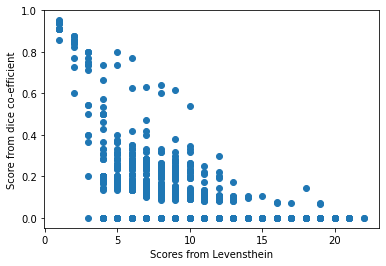

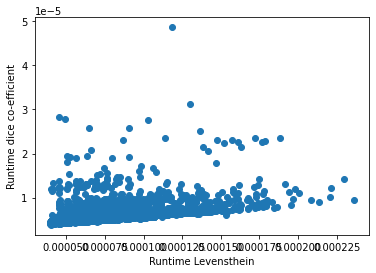

In [ ]:

!pip -q install wikipedia
import wikipedia
import random
import matplotlib.pyplot as plt
from tabulate import tabulate

def lev(a,b):
  d, m, n = {}, len(a), len(b)
  for i in range(0,m+1): d[i,0] = i
  for j in range(1,n+1): d[0,j] = j    
  for i in range(1,m+1):
    for j in range(1,n+1):
      if a[i-1] == b[j-1]: s = 0
      else: s = 1
      d[i,j] = min(d[i-1,j  ]+1, 
                   d[i  ,j-1]+1, 
                   d[i-1,j-1]+s)
  return d[m,n]

def dice(a,b):
  if len(a)<3 or len(b)<3: return 0.0
  tri_a = {a[i:i+3] for i in range(len(a)-2)}
  tri_b = {b[i:i+3] for i in range(len(b)-2)}
  return 2.0*len(tri_a.intersection(tri_b)) / (len(tri_a) + len(tri_b))

ls,lts,ds,dts = [],[],[],[]
s=wikipedia.page("artificial intelligence").content
words = s.split()
total=0
len_cutoff = 6 # words have to be longer than this
max_examples = 10
examples = [["a","b","lev","dice"]]
for i in range(100000):
  a = words[random.randrange(len(words))]
  b = words[random.randrange(len(words))]

  if a!=b and len(a)>len_cutoff and len(b)>len_cutoff:
    total+=1
    t=time.time()
    l = lev(a,b)
    lt = time.time()-t
    ls.append(l)
    lts.append(lt)

    t=time.time()
    d = dice(a,b)
    dt = time.time()-t
    ds.append(d)
    dts.append(dt)

    if d>0.6 and d<0.7 and len(examples)<max_examples: 
      examples.append([a,b,l,round(d,2)])

print()
print("Analysed %d randomly selected pairs of words from a wiki article."%total)
print("Words had to be longer than %d. Some Examples:"%len_cutoff)
print()
print(tabulate(examples, headers="firstrow"))
print()

plt.scatter(ls,ds)
plt.xlabel('Scores from Levensthein')
plt.ylabel('Score from dice co-efficient')
plt.show()

plt.scatter(lts,dts)
plt.xlabel('Runtime Levensthein')
plt.ylabel('Runtime dice co-efficient')
plt.show()

# 5 HMM

In [ ]:
from collections import defaultdict
from tabulate import tabulate


data="""
SPPOOOOLE $ John Denver will be playing in Denver €
SLOOOOLE  $ Denver is a city in Colorado €
SPOPOOLE  $ John and Paris went to Washington €
SOOOOPPE  $ The Oscar goes to Denzel Washington €
SPOOLE    $ Oscar lives in Washington €
"""

class prob():
    """Counts occurances for a pair of keys (either state to state or state to observation)
    as well as frequency of first state overall. Output are probability to transition/emission."""
    
    def __init__(self):
        self.c=defaultdict(int)
        self.n=defaultdict(int)
        self.p=defaultdict(float)
        
    def inc(self,k1,k2):
        self.c[(k1,k2)] += 1
        self.n[k1] += 1

    def prob(self):
        for (k1,k2) in self.c:
            self.p[(k1,k2)] = float(self.c[(k1,k2)]) / float(self.n[k1])
        return self.p

def readTraining():
    """Data format: First word rpresents state sequence. Remaining words are observations.
    For each character in the first word, there must be a word following.
    Start state is S, End state is E
    """
    t=prob()
    e=prob()
    for line in data.strip().split("\n"):
        l = line.split()
        seq=list(l[0])
        obs=l[1:]
        if len(seq)!=len(obs):
            print("Format error in line %s"%(line))
        else:
            # Count transitions
            for i in range(len(seq)-1):
                t.inc(seq[i],seq[i+1])
            # Count emissions
            for i in range(len(seq)):
                e.inc(seq[i],obs[i])
    return (t.prob(), e.prob())

def max_pos(l):
    """Returns the maximum and its position."""
    m = max(l)
    return(l.index(m),m)

####################################################
#
# Viterbi is the main method
#
####################################################
    
def viterbiAlg(str, transition, emission):
    viterbi={} # dynamic programming matrix
    pos={}     # matrix to record path for backtracking
    obs = str.split()
    states = list(set([s for (s,o) in emission]))
    # Init
    for s in states:
        viterbi[(s,0)]= float(s=="S")
    # Fill matrix
    for i in range(1,len(obs)):
        for j in states:
            # Fji = max F(r,i-1)*A(r,j)*B(j,i)
            (pos[(j,i)],viterbi[(j,i)]) = max_pos([viterbi[(r,i-1)]*transition.get((r,j),0.0)*emission.get((j,obs[i]),0.0) for r in states])
    # Output table
    table = [[""]+ obs]
    for s in states:
        row = [s]
        for i in range(len(obs)):
            row.append(viterbi[(s,i)])
        table.append(row)
    s = "E"
    seq= ["E"]
    for i in range(len(obs)-1,0,-1):
        s = states[pos[(s,i)]]
        seq.insert(0,s)
    table.append([""]+seq)
    print()
    print(tabulate(table, headers="firstrow"))
    
#######################################################
#
# Main method
#
#######################################################

transition={}
emission={}
(transition, emission) = readTraining()
observations = set([o for (s,o) in emission])

print()
print("Transitions:")
t = sorted(transition.items(), key=lambda x: x[1], reverse=True)
for ((s1,s2),v) in t:
    print("%s -> %s: %0.2f"%(s1,s2,v))

print()
print("Emissions:")
e = sorted(emission.items(), key=lambda x: x[1], reverse=True)
for ((s,o),v) in e:
    print("%s -> %s: %0.2f"%(s,o,v))

print()
print("Write a sentence using the vocabulary above.")
print("E.g. Oscar went to Denzel or Oscar went to Washington.")
s= input()
viterbiAlg("$ "+s+" €", transition, emission)




Transitions:
L -> E: 0.80
O -> O: 0.65
S -> P: 0.60
P -> O: 0.57
P -> P: 0.29
O -> L: 0.24
S -> L: 0.20
L -> O: 0.20
S -> O: 0.20
P -> E: 0.14
O -> P: 0.12

Emissions:
S -> $: 1.00
E -> €: 1.00
L -> Denver: 0.40
L -> Washington: 0.40
P -> John: 0.29
L -> Colorado: 0.20
O -> in: 0.18
P -> Denver: 0.14
P -> Paris: 0.14
P -> Denzel: 0.14
P -> Washington: 0.14
P -> Oscar: 0.14
O -> to: 0.12
O -> will: 0.06
O -> be: 0.06
O -> playing: 0.06
O -> is: 0.06
O -> a: 0.06
O -> city: 0.06
O -> and: 0.06
O -> went: 0.06
O -> The: 0.06
O -> Oscar: 0.06
O -> goes: 0.06
O -> lives: 0.06

Write a sentence using the vocabulary above.
E.g. Oscar went to Denzel or Oscar went to Washington.
Oscar went to Paris

    $    Oscar                 went                  to                      Paris                   €
--  ---  --------------------  --------------------  ----------------------  ----------------------  ---------------------
E   0.0  0.0                   0.0                   0.0                 

# 5 Progressive alignment

The code implements progressive alignment. Given a list of strings, they are one by one aligned. The base is the Levenshtein distance and alignment function, but instead of strings alignments are compared. Overall, the code looks very similar to the basic Levenshtein, yet all of the indices may be confusing. But it works! The key is that we move from using a[i] to access a letter in string to an alignment. It is represented as a list of strings. The function get(a,i) takes this list and returns a list of the letters at position i for all of the strings in a.

In [ ]:
def cmp(a,b):
    """Returns the score for comparing a and b, which may be characters or the gap symbol."""
    if a==b and a!="-":
        return 0
    elif a=="-" or b=="-":
        return 1
    else:
        return 1.5

def sum_of_pairs(aa,bb):
    """Computes the sum of pairs of all characters in string aa against all characters in string bb.

    aa and bb are alignments and may contain the gap symbol."""
    c=0
    for a in aa:
        for b in bb:
            c+=cmp(a,b)
    return c

def min_dir(a,b,c):
    """Returns the minimum value of a, b, and c and which are minimal.

    c is encoded as NW, b as N and a as W.
    More than one can be the minimum.
    Preference is given to NW, then N, then W.
    This means that alignments with match/mismatch
    from end to front are preferred. If all alignments
    are needed, then the function has to return a set of directions
    instead of single direction."""
    if c==min(a,b,c):
        return (c,"NW")
    if b==min(a,b,c):
        return (b,"N")
    if a==min(a,b,c):
        return (a,"W")

def align(a,b,d_dir,i,j):
    """Outputs the alignment of alignments a and b up to position i and j given the direction matrix d_dir.

    Alignments a and b are lists of strings with the original character sequences possibly with gaps."""
    if i==0 and j==0:
        return [[""]*len(a),[""]*len(b)]
    elif d_dir[i,j]=="N":
        (a2,b2)=align(a,b,d_dir,i,j-1)
        return [add(a2,gap(a)),add(b2,get(b,j-1))]
    elif d_dir[i,j]=="W":
        (a2,b2)=align(a,b,d_dir,i-1,j)
        return [add(a2,get(a,i-1)), add(b2,gap(b))]
    elif d_dir[i,j]=="NW":
        (a2,b2)=align(a,b,d_dir,i-1,j-1)
        return [add(a2,get(a,i-1)), add(b2,get(b,j-1))]

def get(a,i):
    """Returns the list of characters at position i in the alignment a, which is a list of strings."""
    return [s[i] for s in a]

def add(a,aas):
    """Given a list of n strings (an alignment) and a list of n characters, add appends character i to string i.""" 
    a2=[]
    for i in range(len(a)):
        a2.append(a[i]+aas[i])
    return a2

def ins(a,b):
    """Returns the penalty for inserting/deleting into alignment a or b."""
    return len(a)*len(b)*gap

def gap(a):
    """Returns n gaps for an alignment of n sequences."""
    return ["-"]*len(a)

def lev2(a, b):
    """Align the two alignments a and b and return the common alignment and its score."""
    m = len(a[0])
    n = len(b[0])
    d = {}
    d_dir = {}
    d[(0, 0)] = 0
    d_dir[(0, 0)] = ""
    for i in range(1, m + 1):
        d[(i, 0)] = i*len(a)
        d_dir[(i, 0)] = "W"
    for j in range(1, n + 1):
        d[(0, j)] = j*len(b)
        d_dir[(0, j)] = "N"
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            (d[(i, j)],d_dir[(i, j)]) = min_dir(d[(i - 1, j)] + sum_of_pairs(get(a,i-1),gap(b)),
                                            d[(i, j - 1)] + sum_of_pairs(gap(a),get(b,j-1)),
                                            d[(i - 1, j - 1)] + sum_of_pairs(get(a,i-1),get(b,j-1)))
    (a1,a2)=align(a,b,d_dir,m,n)
    a1.extend(a2)
    return (d[(m, n)], a1)
     

def msaList(a):
    """Progressive alignment of the sequences in a.

    Succesively, the sequences in a are added to an alignment.
    The final alignment is returned."""
    b=[a[0]]
    for i in range(1,len(a)):
        (score,b) = lev2(b,[a[i]])
    return (score,b)


names=["Februar","February","Febbraio","Febrero","Fevrier"]

(s,a)=msaList(names)

for aa in a:
  print(aa)

Fe-bruar-
Fe-bruary
Febbr-aio
Fe-bre-ro
Fev-rier-


# 6 Decision tree

In [ ]:
# decision tree
from collections import defaultdict
from math import log

data = [
["NearbyAlternative",  "Bar",  "Friday/Saturday",  "Hungry",  "Patrons",   "Price",  "Rain",  "Reservation",  "Type",     "Estimated Wait",    "Wait"],
#"Alt",  "Bar",  "Fri",  "Hun",  "Pat",   "Price",  "Rain",  "Res",  "Type",     "Est",    "Wait"],
["Yes",  "No",   "No",   "Yes",  "Some",  "$$$",    "No",    "Yes",  "French",   "0-10",   "Yes"],
["Yes",  "No",   "No",   "Yes",  "Full",  "$",      "No",    "No",   "Thai",     "30-60",  "No"],
["No",   "Yes",  "No",   "No",   "Some",  "$",      "No",    "No",   "Burger",   "0-10",   "Yes"],
["Yes",  "No",   "Yes",  "Yes",  "Full",  "$",      "No",    "No",   "Thai",     "10-30",  "Yes"],
["Yes",  "No",   "Yes",  "No",   "Full",  "$$$",    "No",    "Yes",  "French",   ">60",    "No"],
["No",   "Yes",  "No",   "Yes",  "Some",  "$$",     "Yes",   "Yes",  "Italian",  "0-10",   "Yes"],
["No",   "Yes",  "No",   "No",   "None",  "$",      "Yes",   "No",   "Burger",   "0-10",   "No"],
["No",   "No",   "No",   "Yes",  "Some",  "$$",     "Yes",   "Yes",  "Thai",     "0-10",   "Yes"],
["No",   "Yes",  "Yes",  "No",   "Full",  "$",      "Yes",   "No",   "Burger",   ">60",    "No"],
["Yes",  "Yes",  "Yes",  "Yes",  "Full",  "$$$",    "No",    "Yes",  "Italian",  "10-30",  "No"],
["No",   "No",   "No",   "No",   "None",  "$",      "No",    "No",   "Thai",     "0-10",   "No"],
["Yes",  "Yes",  "Yes",  "Yes",  "Full",  "$",      "No",    "No",   "Burger",   "30-60",  "Yes"]
]

header = data[0] # header from data
data = data[1:]      # remove header from data

def entropy(labels):
  probabilities = [labels.count(label) / len(labels) for label in set(labels)]
  return -sum([probability*log(probability,2) for probability in probabilities])
    
def information_gain(examples, attribute):
  labels = [data[example][-1] for example in examples] # data[example][-1] is the label of example
  values = set([data[example][attribute] for example in examples]) # all values for a given attribute
  value2labels = defaultdict(list)
  for example in examples:
    value2labels[data[example][attribute]].append(data[example][-1])
  return entropy(labels) - sum([len(labels_i) / len(labels) * entropy(labels_i) for labels_i in value2labels.values()])

def separate(examples, attribute):
  values = set([data[example][attribute] for example in examples])
  pairs = [(data[example][attribute], example) for example in examples]
  value2examples = defaultdict(list)
  for (value, index) in pairs:
    value2examples[value].append(index)
  return value2examples

def question(examples, indent):
  if entropy([data[example][-1] for example in examples]) == 0.0:
    print(" "*indent + header[-1]+"="+data[examples[0]][-1])
  else:
    attributes = range(len(header)-1)
    best = max(attributes, key=lambda attribute: information_gain(examples, attribute))
    value2examples = separate(examples, best)
    for (value, examples4value) in value2examples.items():
      print(" "*indent + "if "+header[best]+"=="+value+":")
      question(examples4value, indent+3)

examples = range(len(data))

import random
print("Overal there are %d examples."%len(data))
for bootstrap in range(3):
  subset = random.choices(examples,k=int(1.0*len(examples)))
  print()
  print("Decision tree for examples ", sorted(subset))
  question(subset,0)


Overal there are 12 examples.

Decision tree for examples  [0, 0, 2, 3, 5, 6, 7, 8, 9, 9, 10, 11]
if Patrons==Some:
   Wait=Yes
if Patrons==Full:
   if Type==Italian:
      Wait=No
   if Type==Thai:
      Wait=Yes
   if Type==Burger:
      if NearbyAlternative==No:
         Wait=No
      if NearbyAlternative==Yes:
         Wait=Yes
if Patrons==None:
   Wait=No

Decision tree for examples  [1, 1, 2, 2, 3, 4, 4, 4, 6, 8, 10, 11]
if Patrons==None:
   Wait=No
if Patrons==Full:
   if Estimated Wait==30-60:
      if Bar==Yes:
         Wait=Yes
      if Bar==No:
         Wait=No
   if Estimated Wait==>60:
      Wait=No
   if Estimated Wait==10-30:
      Wait=Yes
if Patrons==Some:
   Wait=Yes

Decision tree for examples  [1, 2, 2, 4, 5, 7, 8, 9, 10, 11, 11, 11]
if Estimated Wait==30-60:
   if Bar==Yes:
      Wait=Yes
   if Bar==No:
      Wait=No
if Estimated Wait==0-10:
   if Patrons==Some:
      Wait=Yes
   if Patrons==None:
      Wait=No
if Estimated Wait==>60:
   Wait=No
if Estimated Wait==

# 7 Argumentation

This programme computes justified arguments
using a fix point argumentation semantics.

Using different notions of attack such as undercuts, attacks, defeats, strong undercuts and attacks a proponent and opponent argue about the truth of conclusions. Depending on the strength of proponent and opponent, the semantics becomes more or less credulous.

Arguments are provided in the file arg_example.txt

Arguments follow a simple syntax:
 -a <- b.
 b <- not c,d.
 d <-.

Rules must be in one line.
Rules must end with a dot.
Rules must contain <- even if they are facts.
Objective literals --a (double negation) are not allowed
Just one rule per objective literal.

Since there is only one rule per objective literal,
we can identify this rule given its header objective literal.
In the code below an argument is only implicitly a set of rules.
Explicitly, it is nothing but a rule. However, the rule's objective
literals in its body are accepted, which means there exist rules for them.

In [ ]:
from tabulate import tabulate

data="""
p<-not q.
q<-not p. 
-q<-not r.
s<-.
r<-not s.
-s<-not s.
"""


class literal():
    """An objective literal is either an atom A or a negated atom neg A.
    A default literal has the form not L, where L is an objective literal.
    A literal is either a default or an objective literal.

    You can use attributeds isDefault, isObjective, objective, isNeg, atom.
    """

    def __init__(self, s):
        s = s.strip()
        self.s = s
        self.isDefault = s.startswith("not")
        self.isObjective = not self.isDefault
        if self.isDefault:
            self.objective = s[3:].strip()
        else:
            self.objective = s
        self.isNeg = self.objective.startswith("-")
        if self.isNeg:
            self.atom = self.objective[1:]
        else:
            self.atom = self.objective


################################################
#
# Here are notions of attack
#
# These functions are not defined within the rule class,
# since we want to use them globally and pass them as
# parameters.
#
################################################
            
def rebuts(a, b):
    return a.head.atom == b.head.atom and (a.head.isNeg != b.head.isNeg)
    
def undercuts(a, b):
    for bodyLiteral in b.body:
        if bodyLiteral.isDefault and bodyLiteral.objective == a.head.objective:
            return True
    return False

def attacks(a, b):
    return rebuts(a,b) or undercuts(a,b)

def defeats(a, b):
    return undercuts(a,b) or (rebuts(a,b) and not undercuts(b,a))

def strongly_attacks(a, b):
    return attacks(a,b) and not undercuts(b,a)

def strongly_undercuts(a, b):
    return undercuts(a,b) and not undercuts(b,a)

class rule():
    """A rule has a head and a body. The head is an objective literal.
    The body is either empty or consists of objective and default literals.
    Syntax: head <- L1, not L2, ..."""
    
    def __init__(self, s):
        s = s.strip()
        self.s = s
        # remove dot at the end of the string and split at <-
        l = s.rstrip(".").split("<-")
        self.head = literal(l[0])
        if l[1]:
            # split body string at commas and convert items to literal using map.
            self.body = [literal(x) for x in l[1].split(",")]
        else:
            self.body = []

    def isArgument(self, S):
        """A rule is an argument if the objective literals in its body are in S.
        This means, there were rules for these objective literals, as required
        by the formal definition of an argument. Also the default literals in the
        body is must not yet be accepted."""
        for bodyLiteral in self.body:
            if bodyLiteral.isObjective and bodyLiteral.objective not in [x.head.objective for x in S]:
                return False
        return True

    def existsArgument(self, S, y, b):
        """There is an accepted argument in S, which y-attacks argument b"""
        for c in S:
            if y(c,b):
                return True
        return False
    
    def isAcceptable(self, S,x,y, arguments):
        """An argument a is acceptable if for all b, which  x-attack a,
        there is an accepted agument c, which y-attacks b."""
        for b in arguments:
            if x(b,self) and not self.existsArgument(S,y,b):
                return False
        return True
                
    def str(self):
        """Return a list of head and body string for use in tabulate."""
        return [self.head.s, "<-", ", ".join([x.s for x in self.body]), "."]

    
class arguments():

    def __init__(self, data):
        self.rules = self.read(data)
        self.s = self.str(self.rules)
        
    def str(self, rules2):
        """Returns tabulate of all rules in rules2."""
        return tabulate([r.str() for r in rules2])

    def str2(self, rules2):
        """Returns a string with all the heads of the rules in rules2."""
        return "{"+", ".join([r.head.s for r in rules2])+"}"

    def read(self, data):
        """Reads rules."""
        rules = []
        for line in data.strip().split("\n"):
            r = rule(line)
            rules.append(r)
        return rules

    def f(self, S,x,y):
        """Main function, which collected accetable arguments."""
        S2 = set([])
        for a in self.rules:
            if a.isArgument(S) and a.isAcceptable(S,x,y, self.rules):
                S2.add(a)
        return S2

    def justified(self, x, y):
        """Fixpoint semantics. Starting with the empty set, f is iteratively
        applied, until it reaches a fix point. In each step f computes the
        acceptable arguments wrt. the arguments accepted so far."""
        S=set([])
        i=0
        f_S = self.f(S,x,y)
        while f_S != S:
            #print("\nIteration %d for %s/%s justified arguments"%(i,x.__name__,y.__name__))
            #print("f(%s) = %s"%(self.str2(S), self.str2(f_S)))            
            i+=1
            S = f_S
            f_S = self.f(S,x,y)
        return S



# Read rules and print them to screen          
args = arguments(data)
print("\nRules:\n%s\n"%(args.s))

# Check all of the following notions of attack, as defined above
notions_of_attack = [undercuts, attacks, defeats, strongly_undercuts, strongly_attacks]
all = [["","x","y","Justified arguments"]]
i=0

# Check all combintations of notions of attack for proponent and opponent
for x in notions_of_attack:
    for y in notions_of_attack:
        i+=1
        # Compute the justified arguments
        just = args.justified(x,y)
        # And print them nicely
        #print("\n\nJustified arguments for x=%s and y=%s:\n%s\n"%(x.__name__, y.__name__,args.str(just)))
        all.append([i,x.__name__, y.__name__,", ".join([x.head.s for x in just])])

print("\n\n%s\n"%(tabulate(all, headers="firstrow")))


Rules:
--  --  -----  -
p   <-  not q  .
q   <-  not p  .
-q  <-  not r  .
s   <-         .
r   <-  not s  .
-s  <-  not s  .
--  --  -----  -



    x                   y                   Justified arguments
--  ------------------  ------------------  ---------------------
 1  undercuts           undercuts           -q, s
 2  undercuts           attacks             p, -q, s
 3  undercuts           defeats             p, -q, s
 4  undercuts           strongly_undercuts  -q, s
 5  undercuts           strongly_attacks    p, -q, s
 6  attacks             undercuts
 7  attacks             attacks
 8  attacks             defeats
 9  attacks             strongly_undercuts
10  attacks             strongly_attacks
11  defeats             undercuts           s
12  defeats             attacks             s
13  defeats             defeats             s
14  defeats             strongly_undercuts  s
15  defeats             strongly_attacks    s
16  strongly_undercuts  undercuts           p, q, -q

# 8 Probabilisitc reasoning

We implement a simple spam filter

Execute wget and unzip to retrieve the data from UC Irvine Machine Learning Repository.

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
!unzip smsspamcollection.zip

--2020-11-02 15:19:12--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203415 (199K) [application/x-httpd-php]
Saving to: ‘smsspamcollection.zip’

smsspamcollection.z 100%[===================>] 198.65K   384KB/s    in 0.5s    

2020-11-02 15:19:13 (384 KB/s) - ‘smsspamcollection.zip’ saved [203415/203415]

Archive:  smsspamcollection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  


Here is the main piece of code, which computes probabilities from the training data and uses it in the predict function for the test data. The third part of the code computes accuracy measures for the prediction.

In [ ]:
from collections import defaultdict
from tabulate import tabulate
import random

data = [line.split("\t") for line in open("SMSSpamCollection")]
random.shuffle(data)
upto = int(len(data)*0.8)
training_data, test_data = data[:upto], data[upto:]

labels = [label for (label,msg) in training_data]
sum_n_ham  = labels.count("ham")
sum_n_spam = labels.count("spam")
p_ham  = float(sum_n_ham)  / len(labels) 
p_spam = float(sum_n_spam) / len(labels)

def msg2words2(msg):
  return set(msg.split())

n_ham, n_spam = defaultdict(int), defaultdict(int)
for [label, msg] in training_data:
  for word in msg2words(msg):
    if label=="ham":
      n_ham[word] += 1
    else:
      n_spam[word] += 1

n_voc = len(set(list(n_ham.keys())+list(n_spam.keys())))

def predict(msg):
  p_msg_ham = 1.0
  p_msg_spam = 1.0  
  for word in msg2words(msg):
    p_msg_ham  *= (n_ham[word] +1) / (sum_n_ham +n_voc)
    p_msg_spam *= (n_spam[word]+1) / (sum_n_spam+n_voc)
  if p_msg_ham*p_ham >= p_msg_spam*p_spam:
    return "ham"
  return "spam"

fn,tp,fp,tn = 0.0,0.0,0.0,0.0
for [label, msg] in test_data:
  predicted = predict(msg)
  if   label == "spam" and predicted == "spam": tp += 1
  elif label == "ham"  and predicted == "ham":  tn += 1
  elif label == "spam" and predicted == "ham":  fn += 1
  elif label == "ham"  and predicted == "spam": fp += 1
precision = tp / (tp+fp)
recall = tp / (tp+fn)
accuracy = (tp+tn) / (tp+fp+tn+fn)

print("There are %d (%d%%) ham and %d (%d%%) spam SMS."%(sum_n_ham,int(100*p_ham),sum_n_spam, int(100*p_spam)))
print("Precision is %.2f, recall %.2f, accuracy %.2f."%(precision,recall,accuracy))

There are 3851 (86%) ham and 608 (13%) spam SMS.
Precision is 0.99, recall 0.86, accuracy 0.98.


Let's try to understand the data better. We print 10 randomly selected example messages.

In [ ]:
from tabulate import tabulate
import random

examples = []
for row in random.sample(data,10):
  examples.append(row)
print("\n10 randomly selected example messages:")
print(tabulate(examples))


10 randomly selected example messages:
----  ---------------------------------------------------------------------------------------------------------------------------------------------------------------
ham   You give us back my id proof and  &lt;#&gt;  rs. We wont allow you to work. We will come to your home within days
ham   When should I come over?
spam  U can WIN £100 of Music Gift Vouchers every week starting NOW Txt the word DRAW to 87066 TsCs www.Idew.com SkillGame, 1Winaweek, age16. 150ppermessSubscription
spam  tddnewsletter@emc1.co.uk (More games from TheDailyDraw) Dear Helen, Dozens of Free Games - with great prizesWith..
ham   K.k:)apo k.good movie.
ham   Hows that watch resizing
ham   Ok
ham   * Was a nice day and, impressively, i was sensible, went home early and now feel fine. Or am i just boring?! When's yours, i can't remember.
ham   K:)i will give my kvb acc details:)
ham   I can't believe how attached I am to seeing you every day. I know you will do the best you c

Let's try to understand the data better. Which words appear frequently in ham and spam messages. Do these words overlap or are there clearly distinct words.

In [ ]:
print("Frequent ham words:  ", end="")
for (word,freq) in sorted(n_ham.items(), key=lambda x:x[1], reverse=True)[:20]:
  print(word, end=" ")

print()
print("Frequent spam words: ", end="")
for (word,freq) in sorted(n_spam.items(), key=lambda x:x[1], reverse=True)[:20]:
  print(word, end=" ")

print()
common = set(n_ham.keys()).intersection(set(n_spam.keys()))
print("Spam has %d words and ham %d. They have %d words in common."%(len(n_ham.keys()), len(n_spam.keys()), len(common)))
print("Frequent words common to both: ", end="")
for word in sorted(common, key=lambda x:n_spam[x]+n_ham[x], reverse=True)[:20]:
  print(word, end=" ")


Frequent ham words:  to I you the a in and i is my me u of for that it at your on have 
Frequent spam words: to a or call the your for you 2 Call is have from on and of with 4 our claim 
Spam has 13584 words and ham 7791. They have 5642 words in common.
Frequent words common to both: to you I a the in and is i for of my u me your have on that are 2 

Let's try to understand the data better. The lecture mentioned the Zipf law originally observed in the 60s in word frequencies of file and directory names. Does it apply to SMS messages, too? A plot will give us the positive answer.

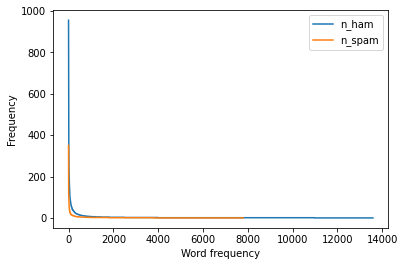

In [ ]:
import matplotlib.pyplot as plt
plt.plot(sorted(n_ham.values(), reverse=True)[0:], label="n_ham")
plt.plot(sorted(n_spam.values(), reverse=True)[0:], label="n_spam")
plt.ylabel('Frequency')
plt.xlabel('Word frequency')
plt.legend()
plt.show()

Let's try to understand the data better. Let's look at misclassified examples and whether each message's words individually. Are they pointing to ham or spam? Why did the classifier get it wrong?

In [ ]:
def print_example(label,predicted,msg):
  table=[["word","ham", "", "spam"]]
  for word in msg2words(msg):  
    p_w_ham  = (n_ham[word] +1) / (sum_n_ham +n_voc)
    p_w_spam = (n_spam[word]+1) / (sum_n_spam+n_voc)
    if p_w_ham > p_w_spam:
      greater = ">"
    else:
      greater = "<="
    table.append([word, p_w_ham, greater, p_w_spam])
  print()
  print("%s was predicted %s"%(label, predicted))
  print(tabulate(table))

for [label, msg] in test_data:
  predicted = predict(msg)
  if label == "spam" and predicted == "ham":
    print_example(label,predicted,msg)
  elif label == "ham"  and predicted == "spam":
    print_example(label,predicted,msg)





spam was predicted ham
------------------------  ----------------------  --  ----------------------
word                      ham                         spam
user                      0.00011379800853485064  <=  0.00027929060187124703
day!2find                 5.689900426742532e-05   <=  0.00013964530093562352
http://www.urawinner.com  5.689900426742532e-05   <=  0.00027929060187124703
4                         0.007624466571834993    >   0.005027230833682447
is                        0.02458036984352774     >   0.0069124423963133645
SURPRISE                  0.0002844950213371266   >   0.00020946795140343527
today                     0.0018776671408250356   >   0.00013964530093562352
lucky                     0.00017069701280227596  <=  0.00027929060187124703
important                 0.0005689900426742532   >   0.00027929060187124703
onto                      5.689900426742532e-05   <=  0.00027929060187124703
log                       0.0002844950213371266   >   0.00020946795140343

We assume that words are independent of each other. Is this valid? For most pairs it will be, but for some it won't. 

In [ ]:
cooc = defaultdict(int)

for [label, msg] in data:
  words = msg.split()
  for i in range(len(words)-1):
    cooc[(words[i], words[i+1])] += 1

table = [[w1,w2,cooc[(w1,w2)]] for ((w1,w2),v) in sorted(cooc.items(), key=lambda x:x[1], reverse=True)[0:10]]
print(tabulate(table))


----  ---  --
I     am   88
in    the  86
are   you  81
have  a    80
want  to   77
to    be   77
will  be   76
in    a    74
.     .    73
you   are  70
----  ---  --


Let's judge the dependency of word consecutive words differently. Instead of counting absolute frequency, let's compute relative frequencies with the log odds ratio.

In [ ]:
freq = defaultdict(int)
logodds = defaultdict(float)
for [label, msg] in data:
  words = msg.split()
  for word in words:
    freq[word] += 1

for (w1,w2) in cooc:
  if freq[w1]>100 and freq[w2]>100:
    logodds[(w1,w2)] = cooc[(w1,w2)] / (freq[w1] * freq[w2])

table = [[w1,w2,logodds[(w1,w2)]] for ((w1,w2),v) in sorted(logodds.items(), key=lambda x:x[1], reverse=True)[:10]]
print(tabulate(table))

---------  -----  -----------
has        been   0.00217486
.          .      0.00125687
I'll       call   0.000828708
don't      know   0.000711125
I'll       text   0.00063262
day        ?      0.000629129
will       be     0.000628728
don't      think  0.000626517
&lt;#&gt;  .      0.000616393
no         need   0.000567924
---------  -----  -----------


How many examples are there and how many distinct words. 

In [ ]:
print("%d examples and %d distinct words"%(len(data),len(freq)))

5574 examples and 15733 distinct words


Which are the most frequent words and how is frequency independently of ham or spam distributed. 

Frequent words: to, you, I, a, the, and, in, is, i, u, for, my, of, me, your, on, have, 2, that, are, it, call, or, be, at, with, not, will, get, can, U, ur, so, I'm, but, &lt;#&gt;, You, from, 4, up, do, ., if, just, go, when, like, know, this, we, all, out, got, was, come, now, ?, am, ..., want, by, Call, time, send, about, only, then, what, need, going, n, I'll, How, still, as, If, one, But, its, he, text, No, our, no, been, Just, We, there, So, love, see, has, some, good, r, Do, think, don't, how, any, &, back, an, home, ü, Your, tell, day, take, My, What, her, dont, free, And, me., Ok, A, The, d, mobile, who, they, i'm, make, FREE, give, him, new, -, phone, later, more, now., she, &amp;, much, Have, you., ask, To, Are, This, Hey, had, great, way, txt, should, Can, reply, here, claim, Good, say, da, meet, e, Its, after, too, really, them, number, very, week, lor., contact, Txt, would, said, every, 1, find, pick, Please, doing, miss, night, work, Pls, did, sent, stop, Oh, right, ok,

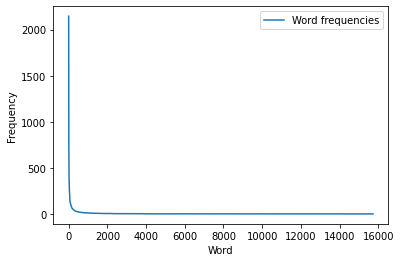

In [ ]:
freq_words = [k for (k,v) in sorted(freq.items(), key=lambda x:x[1], reverse=True)]
print("Frequent words: %s"%(", ".join(freq_words)))


plt.plot(sorted(freq.values(), reverse=True)[0:], label="Word frequencies")
plt.ylabel('Frequency')
plt.xlabel('Word')
plt.legend()
plt.show()

Let's put it together and remove stop words and run the original code and classification again. Run the code below to implement an improved msg2words function. Then go to first piece of code with the Bayes classifier. Comment out the old function msg2words function and run the Bayes classifier code again and voila you have implemented a really good spam filter. 

Besides the basic idea of using the Bayes rule, implementing Laplace smooting and removing stopwords leads to very good overall classification results. Amazing, that such a few lines of code can deliver so good results for a task that would drive us crazy if we had to do it manually.

In [ ]:
stopwords = freq_words[:100]

def clean(w):
  return w.replace('\W+', ' ').replace('\s+', ' ').lower().strip()

def msg2words(msg):
  return set([clean(word) for word in msg.split() if word not in stopwords])

# 9 Linear Regression

Linear regression tries to find weights $w_1$ and $w_0$ so that a function $w_1x+w_0$ approximates the given data best. It uses gradient descent to approach the best weights. Gradient descent is a principle used in many applications such as neural networks. 

f(x)= 2884.25 x + 22.09


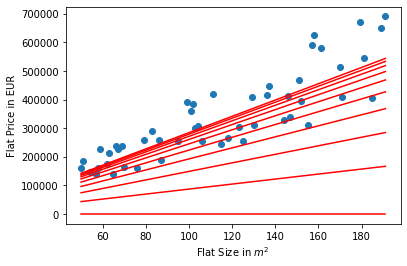

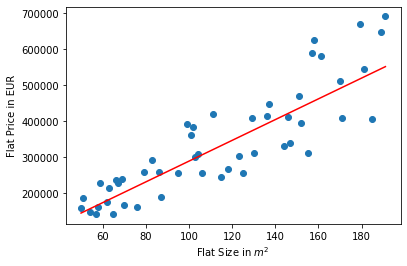

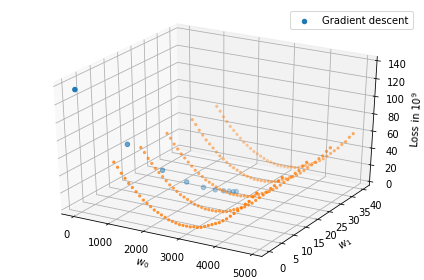

In [ ]:
import math
import random
import matplotlib.pyplot as plt

num = 50
sizes = random.sample(range(50, 200), num)
prices = [size*(1000+offset) for (size,offset) in zip(sizes, random.sample(range(1000, 3000), num))]


def f(x):
  return w1*x + w0

def loss():
  return (1.0/n) * sum([math.pow(y-f(x), 2) for (x,y) in zip(sizes, prices)]) 

n = len(sizes)
w0,w1=0.0,0.0
epochs = 10
alpha = 0.00001
x1,x2 = min(sizes), max(sizes)
l=[]
for i in range(epochs):
  plt.plot([x1,x2], [f(x1),f(x2)], color='red')  # regression line
  l.append((w0,w1,int(loss()/1000000000)))
  w0 += alpha*(2.0/n)*sum([  (y-f(x)) for (x,y) in zip(sizes, prices)])
  w1 += alpha*(2.0/n)*sum([x*(y-f(x)) for (x,y) in zip(sizes, prices)])

print("f(x)= %.2f x + %.2f"%(w1,w0))

plt.scatter(sizes, prices) 
plt.ylabel("Flat Price in EUR")
plt.xlabel("Flat Size in $m^2$")
plt.show()

plt.plot([x1,x2], [f(x1),f(x2)], color='red')  # regression line
plt.scatter(sizes, prices) 
plt.ylabel("Flat Price in EUR")
plt.xlabel("Flat Size in $m^2$")
plt.show()

l2=[]
for w0 in range(0,50,10):
  for w1 in range(1000,5000,100):
    l2.append([w0,w1,int(loss()/1000000000)])
   


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
w0s,w1s,losss = zip(*l)
ax.scatter(w1s, w0s, losss, label="Gradient descent", marker="o")
w0s,w1s,losss = zip(*l2)
ax.scatter(w1s, w0s, losss,  marker=".")
ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
ax.set_zlabel('Loss in $10^9$', rotation=90)
ax.legend()
plt.tight_layout()
plt.show()


Below is some code to illustrate non-linear data, which cannot be handled with linear regression.

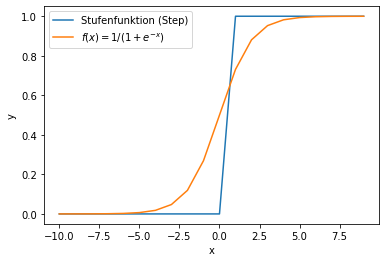

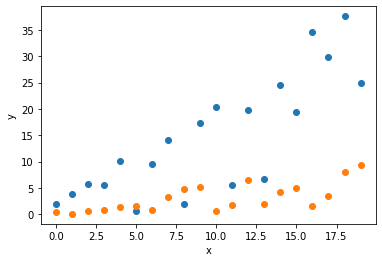

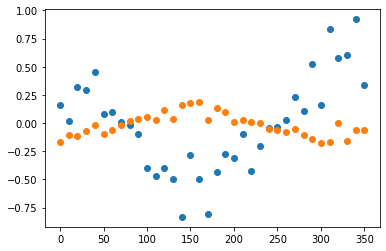

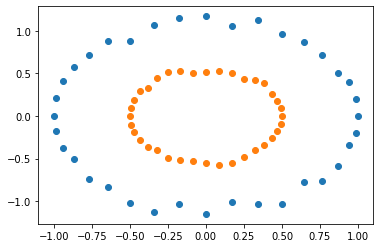

In [ ]:
import math
import random
import matplotlib.pyplot as plt


def logistic(x):
  return 1/(1+math.exp(-x))

def step(x):
  if x>0: return 1.0
  else: return 0.0

xs = range(-10,10,1)
plt.plot(xs,[step(x) for x in xs], label="Stufenfunktion (Step)")
plt.plot(xs,[logistic(x) for x in xs], label="$f(x)=1/(1+e^{-x})$")
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.show()


def f1(x,a,b):
  return a*random.random()*x+b*random.random()

xs = range(0,20,1)
plt.scatter(xs,[f1(x,2,3) for x in xs])
plt.scatter(xs,[f1(x,0.5,1) for x in xs])
plt.ylabel("y")
plt.xlabel("x")
plt.show()

def f2(x,a,b,c):
  return a*math.cos(b*math.radians(x)+c)*random.random()

xs = range(0,360,10)
plt.scatter(xs,[f2(x,1,1,.3) for x in xs])
plt.scatter(xs,[f2(x,-0.2,1.2,0) for x in xs])
plt.show()


angles = [math.radians(alpha) for alpha in range(0,360,10)]
xs = [math.cos(angle) for angle in angles]
ys = [(1.0+random.random()*0.2)*math.sin(angle) for angle in angles]
plt.scatter(xs,ys)
xs = [0.5*math.cos(angle) for angle in angles]
ys = [(1.0+random.random()*0.2)*0.5*math.sin(angle) for angle in angles]
plt.scatter(xs,ys)
#plt.scatter(xs,[f2(x,-0.2,1.2,0) for x in xs])
plt.show()

# 10 Real neural networks

We will analyse a real neural networks of a worm. In a recent Nature paper, the authors analysed some 500 neurons and their connections. This is far from the billions neurons in a human brain, but it is the most detailed connectome known today. The most detailed interactions in mouse are connections between 213 brain regions, so no details on individual neurons. Humans? Nope.

We retrieve the data first. Unfortunately, it is in xls, but we read it from Python and then plot its connectivity patterns. We will find that a few neurons are highly connected and many have few connections. 

It appears that artificial neural networks also evolve a power law topology (see Lou et al., Power Law in Sparsified Deep Neural Networks, bioarxiv), but they comprise far fewer nodes, which means leave open whether it is a valid comparison.

Retrieve the excel file with worm neural network.

In [ ]:
#!wget https://wormwiring.org/Cytoscape%20files/Fig.%201%20Hermaphrodite%20nervous%20system.cys
!wget https://wormwiring.org/si/SI%205%20Connectome%20adjacency%20matrices,%20corrected%20July%202020.xlsx

--2020-10-13 08:58:25--  https://wormwiring.org/si/SI%205%20Connectome%20adjacency%20matrices,%20corrected%20July%202020.xlsx
Resolving wormwiring.org (wormwiring.org)... 45.76.6.231
Connecting to wormwiring.org (wormwiring.org)|45.76.6.231|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4188190 (4.0M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘SI 5 Connectome adjacency matrices, corrected July 2020.xlsx’

SI 5 Connectome adj 100%[===================>]   3.99M  2.78MB/s    in 1.4s    

2020-10-13 08:58:27 (2.78 MB/s) - ‘SI 5 Connectome adjacency matrices, corrected July 2020.xlsx’ saved [4188190/4188190]



openpyxl is a library, which reads and writes excel. We read the spreadsheet, which comprises the adjacency matrix of the network and turn it into a set of edges, which is much better representation as the network is sparse.

In [ ]:
from openpyxl import load_workbook
wb = load_workbook(filename = 'SI 5 Connectome adjacency matrices, corrected July 2020.xlsx')
ws = wb["male chemical"]

nameCol={}
for c in ws['D3':'VF3']:
  for d in c:
    nameCol[d.column] = d.value

nameRow={}
for c in ws['C4':'C385']:
  for d in c:
    nameRow[d.row] = d.value

edges = set([])

def order(n1,n2,v):
  if n1<n2: return (n1,n2,v)
  return (n2,n1,v)

cell_range = ws['D4':'VF385']
for c in cell_range:
  for d in c:
    if d.value:
      edges.add(order(nameCol[d.column], nameRow[d.row], d.value))



Now we can plot the size of the network and the distribution of neighbours.

There are 559 neurons and 5245 connections


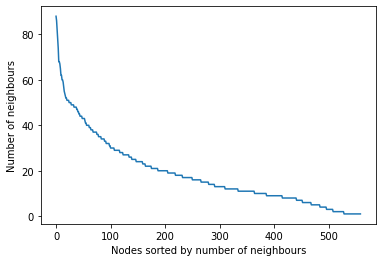

In [ ]:

from collections import defaultdict
import matplotlib.pyplot as plt


conn = defaultdict(int)
for (n1,n2,v) in edges:
  conn[n1]+=1
  conn[n2]+=1

print("There are %d neurons and %d connections"%(len(conn),len(edges)))

plt.plot(sorted(conn.values(), reverse=True))
plt.ylabel('Number of neighbours')
plt.xlabel('Nodes sorted by number of neighbours')
plt.show()


# 11 K means

K means iteratively assigns data points to the nearest representative. After completing a cycle, the representatives are re-computed and the assignment process is started again. A simple, yet fast way to group data.

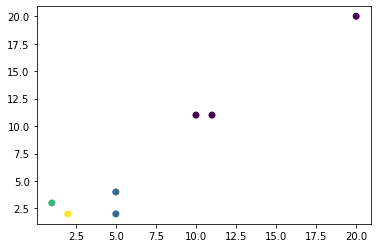

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt


data = [(11.,11.), (5.,2.), (1.,3.), (2.,2.), (10.,11.),(5.0,4.0),(20.,20.)]

def distance(xy1,xy2): # returns Manhattan distance
  (x1,y1),(x2,y2) = xy1,xy2
  return abs(x1-x2)+abs(y1-y2)

def closest(xys,xy1): # returns the index of the closest point
  return min(range(len(xys)), key=lambda i: distance(xy1,xys[i]))

def center(xys): # returns the average x and y
  return tuple([sum(l)/len(l) for l in zip(*xys)])

k = 4 # number of clusters
centers = data[:k] # first k points are initial cluster centers
clusters=defaultdict(list)

#################################
#
# Main loop
#
# Repeat assignment of nodes
# to nearest center and 
# recalculate centers
#
#################################
for steps in range(10):
  clusters=defaultdict(list)
  for xy in data:
    nearest_center = closest(centers,xy)
    clusters[nearest_center].append(xy)
  centers = [center(clusters[oldCenter]) for oldCenter in clusters]

#################################
#
# Plot the resulting clustering
# with mathplotlib. 
# Try to make it nicer with seaborn!
#
#################################
x,y,col=[],[],[]
for center in clusters:
  for xy in clusters[center]:
    x.append(xy[0])
    y.append(xy[1])
    col.append(center)
plt.scatter(x, y, c=col)
plt.show()

# 11 PCA 

This ocde illustrates how PCA rotates and shifts data along the main axes, which we can exploit to reduce the data's dimensionality.

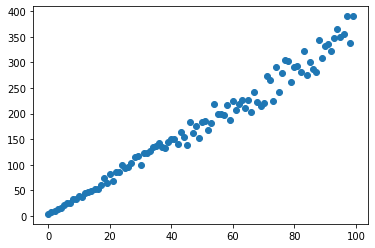

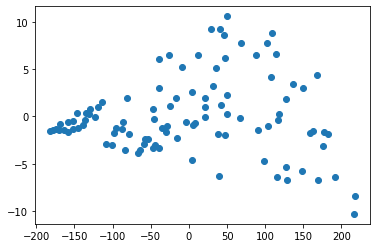

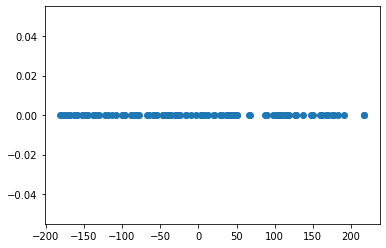

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math
import random

xs = range(0,100,1)
ys = [(3+random.random())*x+3+random.random() for x in xs]


plt.scatter(xs, ys)
plt.show()

data = list(zip(xs,ys))
data2 = PCA(n_components=2).fit_transform(data)
(xs,ys) = zip(*data2)
plt.scatter(xs, ys)
plt.show()

data2 = PCA(n_components=1).fit_transform(data)
plt.scatter(data2, [0]*len(data2))
plt.show()





# 11 PCA for categorical data

PCA is a great way to visualise high-dimensional data. Even if it is categorical, PCA can be useful. Here we map the data of the restaurant example to numerical values and can apply PCA to see the examples in 2D. The visualisation reveals that there are no clear cut clusters for the "wait" and "don't wait" decisions, which means that linear methods are unlikely to work, while non linear methods should be more adequate.

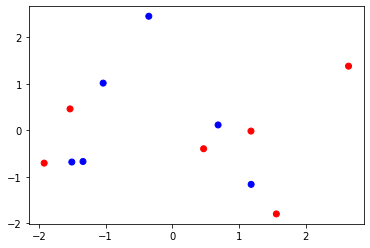

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = [
["NearbyAlternative",  "Bar",  "Friday/Saturday",  "Hungry",  "Patrons",   "Price",  "Rain",  "Reservation",  "Type",     "Estimated Wait",    "Wait"],
#"Alt",  "Bar",  "Fri",  "Hun",  "Pat",   "Price",  "Rain",  "Res",  "Type",     "Est",    "Wait"],
["Yes",  "No",   "No",   "Yes",  "Some",  "$$$",    "No",    "Yes",  "French",   "0-10",   "Yes"],
["Yes",  "No",   "No",   "Yes",  "Full",  "$",      "No",    "No",   "Thai",     "30-60",  "No"],
["No",   "Yes",  "No",   "No",   "Some",  "$",      "No",    "No",   "Burger",   "0-10",   "Yes"],
["Yes",  "No",   "Yes",  "Yes",  "Full",  "$",      "No",    "No",   "Thai",     "10-30",  "Yes"],
["Yes",  "No",   "Yes",  "No",   "Full",  "$$$",    "No",    "Yes",  "French",   ">60",    "No"],
["No",   "Yes",  "No",   "Yes",  "Some",  "$$",     "Yes",   "Yes",  "Italian",  "0-10",   "Yes"],
["No",   "Yes",  "No",   "No",   "None",  "$",      "Yes",   "No",   "Burger",   "0-10",   "No"],
["No",   "No",   "No",   "Yes",  "Some",  "$$",     "Yes",   "Yes",  "Thai",     "0-10",   "Yes"],
["No",   "Yes",  "Yes",  "No",   "Full",  "$",      "Yes",   "No",   "Burger",   ">60",    "No"],
["Yes",  "Yes",  "Yes",  "Yes",  "Full",  "$$$",    "No",    "Yes",  "Italian",  "10-30",  "No"],
["No",   "No",   "No",   "No",   "None",  "$",      "No",    "No",   "Thai",     "0-10",   "No"],
["Yes",  "Yes",  "Yes",  "Yes",  "Full",  "$",      "No",    "No",   "Burger",   "30-60",  "Yes"]
]

header = data[0] # header from data
data = data[1:]      # remove header from data

val2int =  {
    "Yes": 0, "No": 1,
    "None": 0, "Some": 1, "Full": 2,
    "$$$": 0, "$$": 1, "$": 2, 
    "French": 0, "Thai": 1, "Burger": 2, "Italian": 3,
    "0-10":0, "10-30": 1, "30-60": 2, ">60": 3
    }

val2col = {
    "Yes": "blue", "No": "red"
}

data2 = [[val2int[val] for val in example[:-1]] for example in data]

col = [val2col[example[-1]] for example in data]

data3 = PCA(n_components=2).fit_transform(data2)
(x,y) = zip(*data3)
plt.scatter(x, y, c=col)
plt.show()
